In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import zipfile
# zip_file_path = "/content/drive/MyDrive/Digital Image-Signal Processing/Lab-01.zip"
# extracted_folder_path = "/content/drive/MyDrive/Digital Image-Signal Processing"

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_folder_path)

Read image from folder

In [51]:
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt

folder_path = "/content/drive/MyDrive/Digital Image-Signal Processing/Lab-01/Images 25"
image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
images = []

for image_path in image_files:
    img = cv.imread(image_path)
    if img is not None:
        images.append(img)
    else:
        print(f"Error reading image: {image_path}")

print(f"Read {len(images)} images from the folder.")

Read 25 images from the folder.


In [52]:
def resize_images(images, output_folder, new_size=(300, 300)):
    resized_images = []
    for img, image_path in zip(images, image_files):
        resized_img = cv.resize(img, new_size)
        resized_images.append(resized_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder, "resized_" + filename), resized_img)
    return resized_images

def apply_color_transform(images, output_folder):
    transformed_images = []
    for img, image_path in zip(images, image_files):
        transformed_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        transformed_images.append(transformed_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder, "transformed_" + filename), transformed_img)
    return transformed_images

def normalize_images(images, output_folder):
    normalized_images = []
    for img, image_path in zip(images, image_files):
        # Example normalization: Convert to float32 and scale to [0, 1]
        normalized_img = img.astype('float32') / 255.0
        normalized_images.append(normalized_img)
        filename = os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder, "normalized_" + filename), (normalized_img * 255).astype('uint8'))
    return normalized_images

In [53]:
output_folder = r"/content/drive/MyDrive/Digital Image-Signal Processing/Lab-01/processed_images"

# Perform image pre-processing steps
resized_images = resize_images(images, output_folder)
transformed_images = apply_color_transform(images, output_folder)
normalized_images = normalize_images(images, output_folder)

print("Image pre-processing completed.")

Image pre-processing completed.


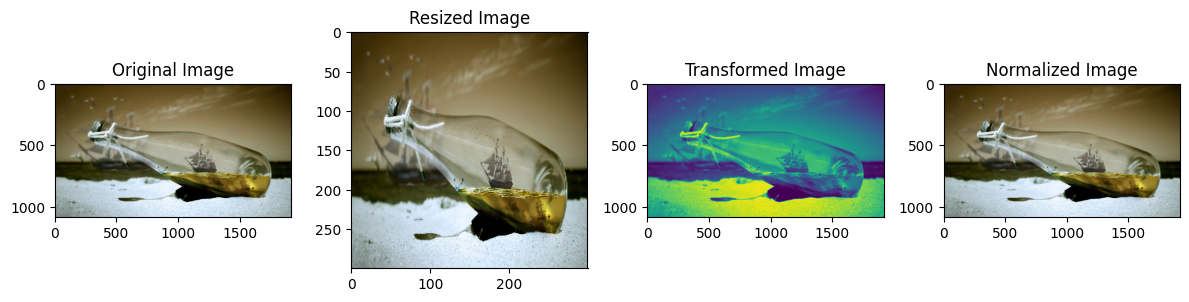

In [54]:
plt.figure(figsize = [12, 4])
plt.subplot(141)
plt.imshow(images[0])
plt.title('Original Image')

plt.subplot(142)
plt.imshow(resized_images[0])
plt.title('Resized Image')

plt.subplot(143)
plt.imshow(transformed_images[0])
plt.title('Transformed Image')

plt.subplot(144)
plt.imshow(normalized_images[0])
plt.title('Normalized Image')

plt.tight_layout()
plt.show()

Resized images from a folder and then save those images in new folder.

In [55]:
import numpy as np
def apply_filters(images, output_folder):
    lowpass_images = []
    highpass_images = []
    gaussian_images = []
    laplacian_images = []
    median_images = []
    box_images = []
    for image, image_path in zip(images, image_files):
        filename = os.path.basename(image_path)
        # Low pass filter
        lowpass = cv.GaussianBlur(image, (3, 3), 0)
        lowpass_images.append(lowpass)
        # High pass filter
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        highpass = cv.filter2D(image, -1, kernel)
        highpass_images.append(highpass)

        # Gaussian filter
        gaussian = cv.GaussianBlur(image, (3, 3), 0)
        gaussian_images.append(gaussian)

        # Laplacian filter
        laplacian = cv.Laplacian(image, cv.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        laplacian_images.append(laplacian)

        # Median filter
        median = cv.medianBlur(image, 3)
        median_images.append(median)

        # Box filter
        box = cv.boxFilter(image, -1, (3, 3))
        box_images.append(box)

        # Save filtered images
        cv.imwrite(os.path.join(output_folder, "lowpass_" + filename), lowpass)
        cv.imwrite(os.path.join(output_folder, "highpass_" + filename), highpass)
        cv.imwrite(os.path.join(output_folder, "gaussian_" + filename), gaussian)
        cv.imwrite(os.path.join(output_folder, "laplacian_" + filename), laplacian)
        cv.imwrite(os.path.join(output_folder, "median_" + filename), median)
        cv.imwrite(os.path.join(output_folder, "box_" + filename), box)
    return lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images

# Create directories to save filtered images
folder_path = r"/content/drive/MyDrive/Digital Image-Signal Processing/Lab-01"
output_folder = os.path.join(folder_path, "filtered_images")
os.makedirs(output_folder, exist_ok=True)

lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images = apply_filters(images, output_folder)


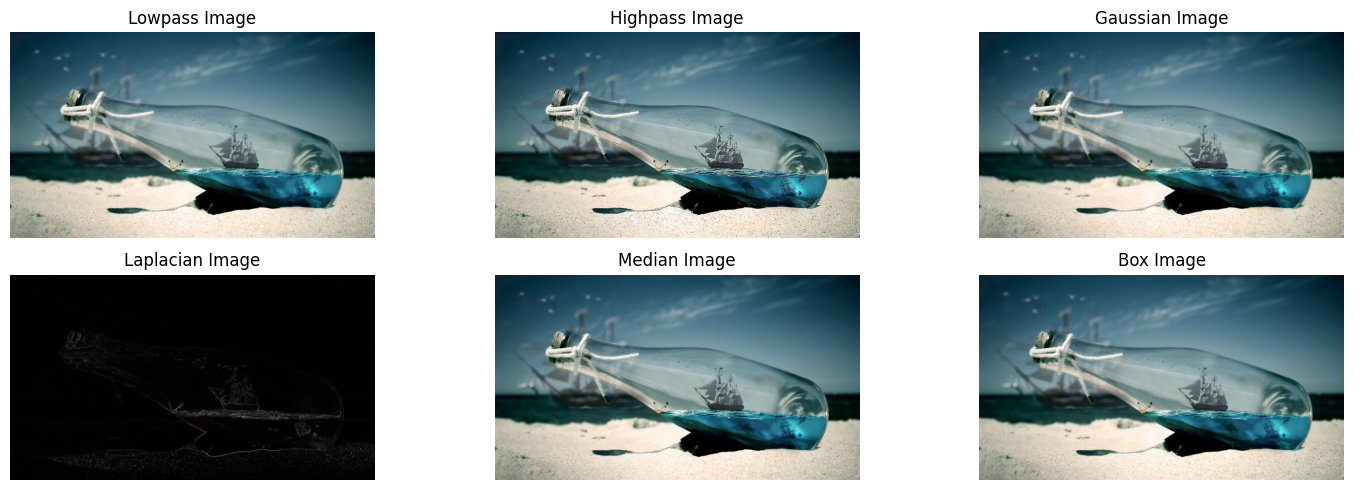

In [56]:
def plot_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images = [lowpass_images[0], highpass_images[0], gaussian_images[0], laplacian_images[0], median_images[0], box_images[0]]
titles = ['Lowpass Image', 'Highpass Image', 'Gaussian Image', 'Laplacian Image', 'Median Image', 'Box Image']
plot_images(images, titles)
